<a href="https://colab.research.google.com/github/pritamdeka/sentence_similarity_using_USE/blob/master/experiment_with_USE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
# Install the latest Tensorflow version.
!pip3 install --upgrade tensorflow-gpu
# Install TF-Hub.
!pip3 install tensorflow-hub
!pip3 install seaborn

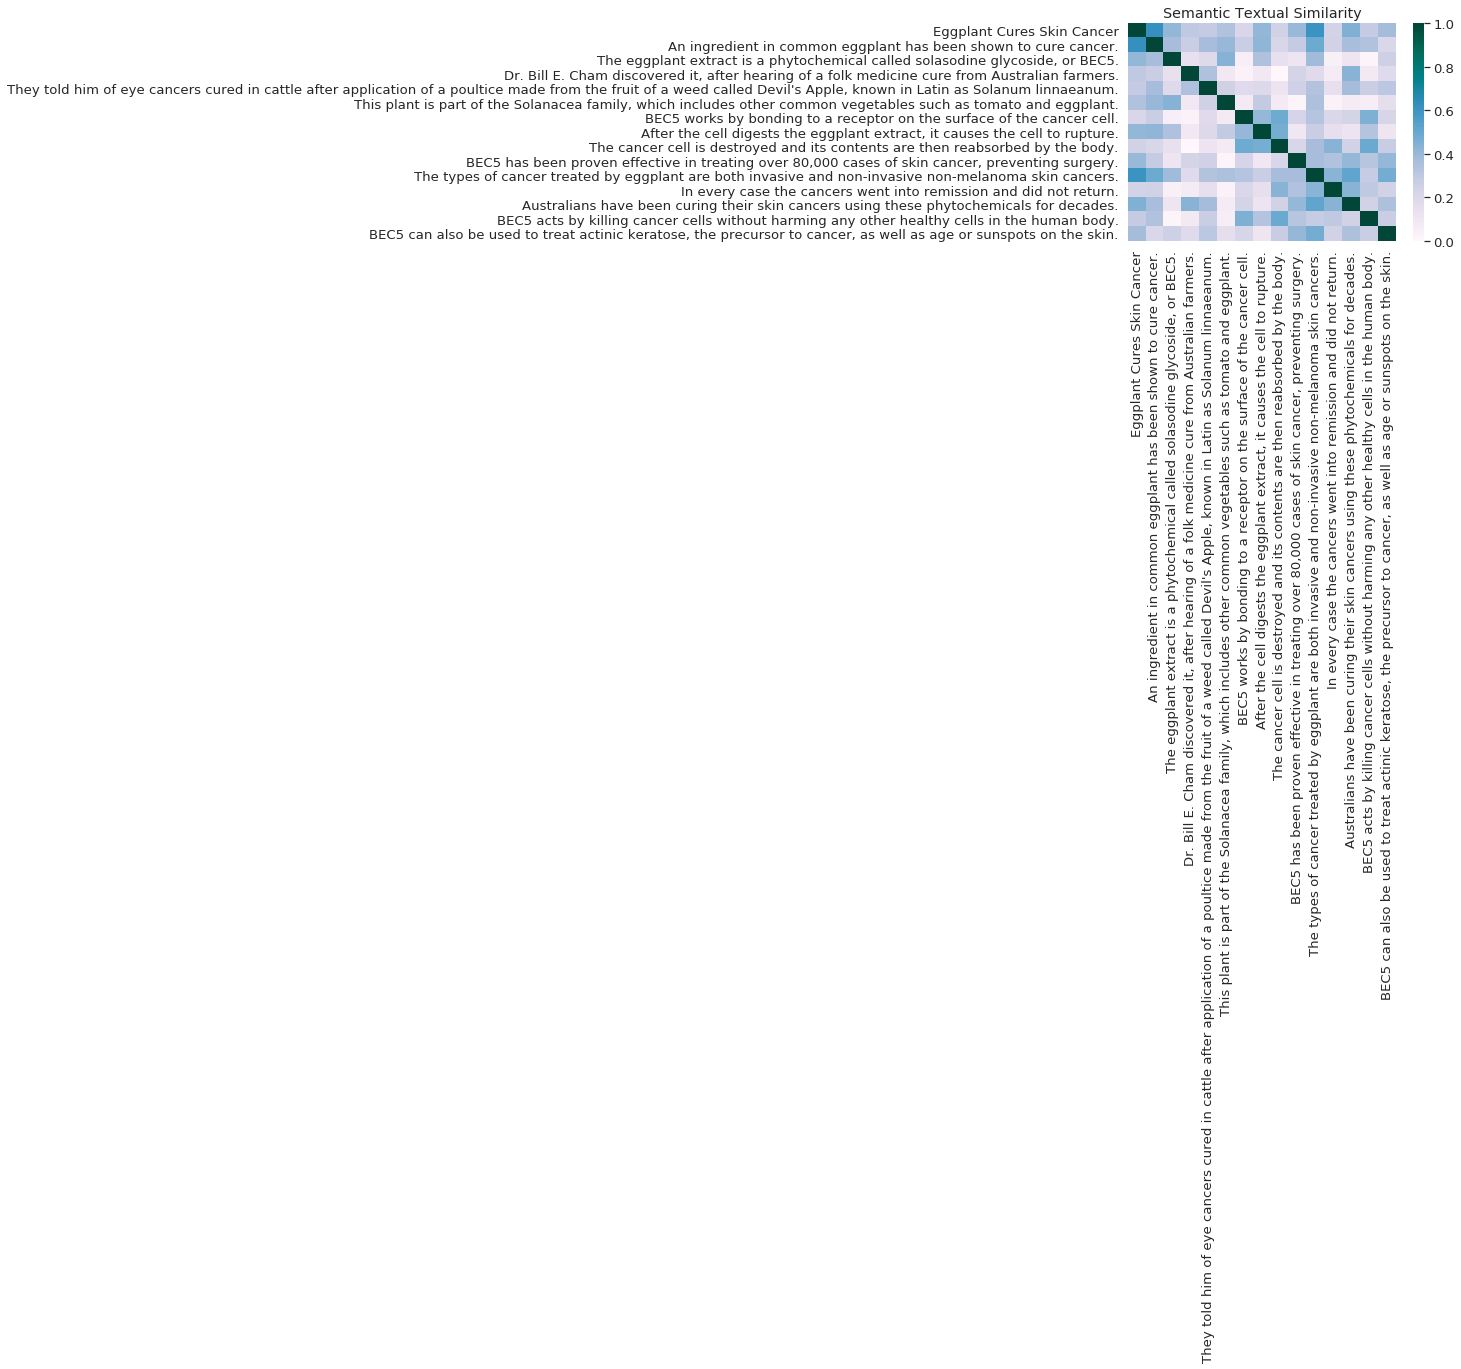

In [21]:
from absl import logging
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

#module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
#model = hub.load(module_url)
#print ("module %s loaded" % module_url)
#def embed(input):
  #return model(input)
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

#embeddings = embed(messages)
#print(embeddings)
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="PuBuGn")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages):
  message_embeddings_ = embed(messages)
  plot_similarity(messages, message_embeddings_, 90)
  #measures = Similarity()
  #measures.cosine_similarity(message_embeddings_[0],message_embeddings_[2])

messages=["Eggplant Cures Skin Cancer",
          "An ingredient in common eggplant has been shown to cure cancer." ,
"The eggplant extract is a phytochemical called solasodine glycoside, or BEC5.", 
"Dr. Bill E. Cham discovered it, after hearing of a folk medicine cure from Australian farmers.",
"They told him of eye cancers cured in cattle after application of a poultice made from the fruit of a weed called Devil's Apple, known in Latin as Solanum linnaeanum.",
"This plant is part of the Solanacea family, which includes other common vegetables such as tomato and eggplant.",
"BEC5 works by bonding to a receptor on the surface of the cancer cell.", 
"After the cell digests the eggplant extract, it causes the cell to rupture.",
"The cancer cell is destroyed and its contents are then reabsorbed by the body.",
    "BEC5 has been proven effective in treating over 80,000 cases of skin cancer, preventing surgery.",
    "The types of cancer treated by eggplant are both invasive and non-invasive non-melanoma skin cancers.",
    "In every case the cancers went into remission and did not return.", 
    "Australians have been curing their skin cancers using these phytochemicals for decades.", 
    "BEC5 acts by killing cancer cells without harming any other healthy cells in the human body.", 
    "BEC5 can also be used to treat actinic keratose, the precursor to cancer, as well as age or sunspots on the skin."]
run_and_plot(messages)